<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/checkensembleproposedmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive For Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librarries

In [ ]:
####Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVR

In [ ]:
from sklearn import metrics # for checking the model accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install pandas_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import time
import matplotlib.pyplot as plt


# Functions Def

In [ ]:
def LoadData(data):
  warnings.filterwarnings('ignore')
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", data+".csv"))
  return df
#Load datas
def preprocessing():

  df1 = LoadData(str(1))
  df2 = LoadData(str(2))

  df1_fillna = df1.copy()
  df2_fillna = df2.copy()

  #Drop Most None Related Value Features
  df1_fillna.drop(["ERC20_uniq_rec_token_name","ERC20_uniq_sent_token_name","ERC20_avg_val_sent","ERC20_max_val_sent","ERC20_min_val_sent","ERC20_avg_val_rec","ERC20_max_val_rec","ERC20_min_val_rec","ERC20_uniq_rec_contract_addr","ERC20_uniq_sent_addr_1","ERC20_uniq_sent_addr","ERC20_total_Ether_sent_contract","ERC20_total_ether_sent","ERC20_total_Ether_received","ERC20_most_rec_token_type","ERC20_most_sent_token_type"], axis=1, inplace=True)
  df1_fillna.drop(["ERC20_uniq_rec_addr","Total_ERC20_tnxs","Time_Diff_between_first_and_last_Mins","total_ether_sent_contracts"], axis=1, inplace=True)
  df2_fillna.drop(["minTimeBetweenSentTnx","maxTimeBetweenSentTnx","minTimeBetweenRecTnx","maxTimeBetweenRecTnx","lifetime","activityDays","dailyMax","ratioRecSent","ratioSentTotal","ratioRecTotal","giniSent","giniRec","txFreq","stdBalanceEth"], axis=1, inplace=True)

  #Rename Columns
  selected_columns = ["address","flag","avgTimeBetweenRecTnx","avgTimeBetweenSentTnx","sentTransactions" ,"receivedTransactions", "createdContracts" ,"Average_of_numUniqRecAddress" ,"Average_of_numUniqSentAddress"
  ,"minValReceived"
  ,"maxValReceived"
  ,"avgValReceived"
  , "minValSent"
  , "maxValSent"
  ,"avgValSent"
  ,"totalTransactions"
  ,"totalEtherSent"
  ,"totalEtherReceived"
  ,"totalEtherBalance"    ]

  df2_fillna = df2[selected_columns].copy()

  df2_fillna.columns = ["Address"
  ,"FLAG"
  ,"Avg_min_between_received_tnx"
  ,"Avg_min_between_sent_tnx"
  ,"Sent_tnx"
  ,"Received_Tnx"
  ,"Number_of_Created_Contracts"
  ,"Average_of_Unique_Received_From_Addresses"
  ,"Average_of_Unique_Sent_To_Addresses"
  ,"min_value_received"
  ,"max_value_received "
  ,"avg_val_received"
  ,"min_val_sent"
  ,"max_val_sent"
  ,"avg_val_sent"
  ,"total_transactions_including_tnx_to_create_contract"
  ,"total_Ether_sent"
  ,"total_ether_received"
  ,"total_ether_balance"
  ]

  merged_df = pd.merge(df1_fillna, df2_fillna, how='outer')
  df_filtered = merged_df.drop_duplicates(subset='Address', keep='first')
  return df_filtered



In [ ]:
def scaled(data):
  # Convert categorical 'FLAG' to numeric
  label_encoder = LabelEncoder()
  data['FLAG'] = label_encoder.fit_transform(data['FLAG'])

  # Splitting the data into features (X) and labels (y)
  X =  data.drop(['FLAG'], axis=1)
  y = data['FLAG']

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  #X_scaled['FLAG'] = y


  return X_scaled,y

In [ ]:
def undersampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = undersampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled, unselected_data

In [ ]:
def oversampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply oversampling
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = oversampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)

    return resampled, unselected_data

In [ ]:
def smote(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    return resampled_data,''

In [ ]:
def ballanced(data,type="O"):

  if type=="U":
    resampled, unselected_data = undersampling(data, 'FLAG')
  elif type=="S":
    resampled, unselected_data  = smote(data, 'FLAG')
  elif type=="O":
    resampled, unselected_data = oversampling(data, 'FLAG')


  return resampled, unselected_data


#**Preprocessing **

In [ ]:
df_filtered = preprocessing()
df_filtered = df_filtered.drop(['Address'], axis=1)

In [ ]:
df_filtered.shape

(20302, 18)

**Imballanced Dataset**

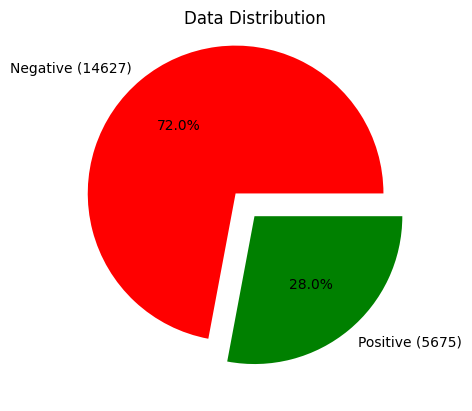

In [ ]:
df = df_filtered
positive_sample = df[(df["FLAG"]==1)]
negative_sample = df[(df["FLAG"]==0)]
dist = df["FLAG"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0], autopct='%1.1f%%')
_ = plt.title("Data Distribution")

In [ ]:
#df_filtered = np.array(df_filtered)

df_filtered.shape

(20302, 18)

In [ ]:
resampledOver, unselected_Over = ballanced(df_filtered,"O")
resampledOver.shape

(29254, 18)

In [ ]:
resampledUnder, unselected_Under = ballanced(df_filtered,"U")
resampledUnder.shape

(11350, 18)

In [ ]:
resampledSmote, unselected_Smote = ballanced(df_filtered,"S")
resampledSmote.shape

(29254, 18)

In [ ]:
resampledSmote.head(10)

,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance,FLAG
0,1093.71,844.26,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,-279.224419,0
1,2958.44,12709.07,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,-0.001819,0
2,2434.02,246194.54,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,0.000441,0
3,15785.09,10219.60,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,34,1750.045862,895.399559,-854.646303,0
4,10707.77,36.61,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,-50.896986,0
5,375.48,9900.12,2,3,0,2,1,0.724148,4.813776,3.234908,4.166800,5.536916,4.851858,5,9.703716,9.704724,0.001008,0
6,629.44,69.46,25,11,0,9,20,0.049000,2.650000,1.098115,0.009457,4.284785,0.482496,36,12.062394,12.079266,0.016872,0
7,176.84,1497.39,213,5,0,3,3,0.118490,2.000000,0.891098,0.000000,0.700000,0.040861,218,8.703392,4.455490,-4.247902,0
8,0.00,0.00,1,1,0,1,1,2.000000,2.000000,2.000000,1.999380,1.999380,1.999380,2,1.999380,2.000000,0.000620,0
9,3336.01,2570.59,8,3,0,2,4,0.100000,40.000000,16.700000,0.100000,40.000000,18.634625,11,149.077000,50.100000,-98.977000,0


#***Rescaling***

In [ ]:
X,y = scaled(resampledOver)

In [ ]:
X_trainV, X_testModel, y_trainV, y_testModel =  train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = X_trainV
y = y_trainV
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)

#ModelsFunctions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def test_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_predict = model.predict(X_test)
    Inference_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    kappa = cohen_kappa_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)

    conf_mat = confusion_matrix(y_test, y_predict)

    print(f'\nMetrics for {model_name} on Test Data:')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Inference Time: {Inference_time:.4f} seconds")
    print(f"Kappa: {kappa:.2f}")
    print(f"Training Time:0 seconds")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"Thresholds: {thresholds}")
    print(f"Confusion Matrix:\n{conf_mat}")
    print("********************************************************************")


In [ ]:
def cross_validate_model(model, X_df, y_df, kf, model_name):
    results = {
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
        'roc_auc': [],
        'Inference_Time': [],
        'kappa': [],
        'Training_time': []
    }

    fld = 1

    for train_index, test_index in kf.split(X_df):
        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        model.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predict = model.predict(X_testV)
        Inference_time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predict)
        precision = precision_score(y_testV, y_predict)
        recall = recall_score(y_testV, y_predict)
        f1 = f1_score(y_testV, y_predict)
        kappa = cohen_kappa_score(y_testV, y_predict)
        roc_auc = roc_auc_score(y_testV, y_predict)

        results['accuracy'].append(accuracy)
        results['recall'].append(recall)
        results['precision'].append(precision)
        results['f1'].append(f1)
        results['roc_auc'].append(roc_auc)
        results['Inference_Time'].append(Inference_time)
        results['kappa'].append(kappa)
        results['Training_time'].append(Training_time)
        print(f'Model {model_name}  Fold {fld}: Done ')
        #print(f'Metrics for {model_name} Model Fold {fld}:')
        #print(f"Inference Time: {Inference_time:.4f} seconds")
        #print(f"Training Time: {Training_time:.4f} seconds")
        #print(f"Accuracy: {accuracy:.2f}")
        #print(f"Precision: {precision:.2f}")
        #print(f"Recall: {recall:.2f}")
        #print(f"F1-score: {f1:.2f}")
        #print(f"Kappa: {kappa:.2f}")
        #print(f"ROC AUC: {roc_auc:.2f}")
        fld += 1
        print("********************************************************************")
    return results,model

In [ ]:
def print_summary_statistics(results, model_name):
    summary = {
        'best': {key: max(values) for key, values in results.items()},
        'worst': {key: min(values) for key, values in results.items()},
        'mean': {key: np.mean(values) for key, values in results.items()}
    }

    print(f'\nSummary Statistics for {model_name}:')
    for metric in summary['best']:
        print(f"{metric.capitalize()}: Best = {summary['best'][metric]:.2f}, "
              f"Worst = {summary['worst'][metric]:.2f}, "
              f"Mean = {summary['mean'][metric]:.2f}")
    print("********************************************************************")

In [ ]:
def cross_validate_cnn(X, y, kf, model_func):
    results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'kappa': [],
        'roc_auc': [],
        'Inference_Time': [],
        'Training_time': []
    }

    fld = 1

    for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X[train_index], X[test_index]
        y_trainV, y_testV = y.iloc[train_index], y.iloc[test_index]

        model = model_func(X_trainV.shape[1:])

        start_time = time.time()
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        Training_time = time.time() - start_time

        start_time = time.time()
        history = model.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=10, batch_size=32, verbose=0)
        Inference_time = time.time() - start_time

        y_predict = (model.predict(X_testV) > 0.5).astype("int32")

        accuracy = accuracy_score(y_testV, y_predict)
        precision = precision_score(y_testV, y_predict)
        recall = recall_score(y_testV, y_predict)
        f1 = f1_score(y_testV, y_predict)
        kappa = cohen_kappa_score(y_testV, y_predict)
        roc_auc = roc_auc_score(y_testV, y_predict)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predict)

        conf_mat = confusion_matrix(y_testV, y_predict)
        results['accuracy'].append(accuracy)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1'].append(f1)
        results['kappa'].append(kappa)
        results['roc_auc'].append(roc_auc)
        results['Inference_Time'].append(Inference_time)
        results['Training_time'].append(Training_time)

        print(f'Model CNN Fold {fld} Done')
        print("********************************************************************")
        fld += 1

    return results, model

In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
def cross_validate_lstm(X, y, kf, model_func):
    results = {
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
        'roc_auc': [],
        'Inference_Time': [],
        'kappa': [],
        'Training_time': []
    }

    fld = 1

    for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X[train_index], X[test_index]
        y_trainV, y_testV = y[train_index], y[test_index]

        model = model_func(X_trainV.shape[1:])

        start_time = time.time()
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        Training_time = time.time() - start_time

        start_time = time.time()
        history = model.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=10, batch_size=32, verbose=0)
        Inference_time = time.time() - start_time

        y_predict = (model.predict(X_testV) > 0.5).astype("int32")

        accuracy = accuracy_score(y_testV, y_predict)
        precision = precision_score(y_testV, y_predict)
        recall = recall_score(y_testV, y_predict)
        f1 = f1_score(y_testV, y_predict)
        kappa = cohen_kappa_score(y_testV, y_predict)
        roc_auc = roc_auc_score(y_testV, y_predict)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predict)

        conf_mat = confusion_matrix(y_testV, y_predict)
        results['accuracy'].append(accuracy)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1'].append(f1)
        results['kappa'].append(kappa)
        results['roc_auc'].append(roc_auc)
        results['Inference_Time'].append(Inference_time)
        results['Training_time'].append(Training_time)

        print(f'Model LSTM Fold {fld} Done')
        print("********************************************************************")
        fld += 1

    return results, model

In [ ]:

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
def create_lstm2_model(input_shape):
    model = Sequential()
    model.add(LSTM(46, activation='relu', input_shape=input_shape))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def create_cnn2_model(input_shape):
    model = Sequential()
    model.add(Conv1D(46, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(30, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def test_model(model, X_test, y_test):
    results = {
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
        'roc_auc': [],
        'Inference_Time': [],
        'kappa': []
    }
    start_time = time.time()
    y_predict = model.predict(X_test)
    Inference_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    kappa = cohen_kappa_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)

    conf_mat = confusion_matrix(y_test, y_predict)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1'].append(f1)
    results['kappa'].append(kappa)
    results['roc_auc'].append(roc_auc)
    results['Inference_Time'].append(Inference_time)

    return results



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve, confusion_matrix
import time

# Define the function to test Keras models (LSTM and CNN)
def test_keras_model(model, X_test, y_test):
    results = {
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
        'roc_auc': [],
        'Inference_Time': [],
        'kappa': []
    }
    start_time = time.time()
    y_predict = (model.predict(X_test) > 0.5)
    Inference_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    kappa = cohen_kappa_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)

    conf_mat = confusion_matrix(y_test, y_predict)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1'].append(f1)
    results['kappa'].append(kappa)
    results['roc_auc'].append(roc_auc)
    results['Inference_Time'].append(Inference_time)

    return results



# #**Models**

#1.ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
resultsExtraTrees = {}
ExtraTrees = ExtraTreesClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)
results_ExtraTrees,ExtraTrees = cross_validate_model(ExtraTrees, X_df, y_df, kf, 'ExtraTrees')

Model ExtraTrees  Fold 1: Done 
********************************************************************
Model ExtraTrees  Fold 2: Done 
********************************************************************
Model ExtraTrees  Fold 3: Done 
********************************************************************
Model ExtraTrees  Fold 4: Done 
********************************************************************
Model ExtraTrees  Fold 5: Done 
********************************************************************
Model ExtraTrees  Fold 6: Done 
********************************************************************
Model ExtraTrees  Fold 7: Done 
********************************************************************
Model ExtraTrees  Fold 8: Done 
********************************************************************
Model ExtraTrees  Fold 9: Done 
********************************************************************
Model ExtraTrees  Fold 10: Done 
**********************************************************

In [ ]:
print_summary_statistics(results_ExtraTrees, 'ExtraTrees')


Summary Statistics for ExtraTrees:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.95, Worst = 0.93, Mean = 0.94
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.95
Inference_time: Best = 0.38, Worst = 0.15, Mean = 0.21
Kappa: Best = 0.91, Worst = 0.90, Mean = 0.90
Training_time: Best = 11.05, Worst = 4.10, Mean = 6.43
********************************************************************


In [ ]:
print_summary_statistics(test_model(ExtraTrees, X_testModel, y_testModel ), 'ExtraTrees')


Summary Statistics for ExtraTrees:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.96, Worst = 0.96, Mean = 0.96
Precision: Best = 0.95, Worst = 0.95, Mean = 0.95
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.44, Worst = 0.44, Mean = 0.44
Kappa: Best = 0.91, Worst = 0.91, Mean = 0.91
********************************************************************


#2.Random Forest

In [ ]:
RF = RandomForestClassifier(random_state=42)
resultsRF = {}
results_RF,RF = cross_validate_model(ExtraTrees, X_df, y_df, kf, 'RandomForest')

Model RandomForest  Fold 1: Done 
********************************************************************
Model RandomForest  Fold 2: Done 
********************************************************************
Model RandomForest  Fold 3: Done 
********************************************************************
Model RandomForest  Fold 4: Done 
********************************************************************
Model RandomForest  Fold 5: Done 
********************************************************************
Model RandomForest  Fold 6: Done 
********************************************************************
Model RandomForest  Fold 7: Done 
********************************************************************
Model RandomForest  Fold 8: Done 
********************************************************************
Model RandomForest  Fold 9: Done 
********************************************************************
Model RandomForest  Fold 10: Done 
**************************************

In [ ]:
print_summary_statistics(results_RF, 'RandomForest')



Summary Statistics for RandomForest:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.95, Worst = 0.93, Mean = 0.94
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.95
Inference_time: Best = 0.81, Worst = 0.15, Mean = 0.23
Kappa: Best = 0.92, Worst = 0.90, Mean = 0.91
Training_time: Best = 5.30, Worst = 4.08, Mean = 4.77
********************************************************************


In [ ]:
print_summary_statistics(test_model(RF, X_testModel, y_testModel ), 'RandomForest')


Summary Statistics for RandomForest:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.96, Worst = 0.96, Mean = 0.96
Precision: Best = 0.95, Worst = 0.95, Mean = 0.95
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.67, Worst = 0.67, Mean = 0.67
Kappa: Best = 0.91, Worst = 0.91, Mean = 0.91
********************************************************************


#3.XGBOOST

In [ ]:
XGB = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)

resultsXGB = {}
resultsXGB,XGB = cross_validate_model(XGB, X_df, y_df, kf, 'XGB')

Model XGB  Fold 1: Done 
********************************************************************
Model XGB  Fold 2: Done 
********************************************************************
Model XGB  Fold 3: Done 
********************************************************************
Model XGB  Fold 4: Done 
********************************************************************
Model XGB  Fold 5: Done 
********************************************************************
Model XGB  Fold 6: Done 
********************************************************************
Model XGB  Fold 7: Done 
********************************************************************
Model XGB  Fold 8: Done 
********************************************************************
Model XGB  Fold 9: Done 
********************************************************************
Model XGB  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsXGB, 'XGB')


Summary Statistics for XGB:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.96
Recall: Best = 0.98, Worst = 0.97, Mean = 0.98
Precision: Best = 0.95, Worst = 0.94, Mean = 0.95
F1: Best = 0.96, Worst = 0.95, Mean = 0.96
Roc_auc: Best = 0.97, Worst = 0.95, Mean = 0.96
Inference_time: Best = 0.05, Worst = 0.02, Mean = 0.03
Kappa: Best = 0.93, Worst = 0.91, Mean = 0.92
Training_time: Best = 4.20, Worst = 1.74, Mean = 2.37
********************************************************************


In [ ]:
print_summary_statistics(test_model(XGB, X_testModel, y_testModel ), 'XGB')


Summary Statistics for XGB:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.97, Worst = 0.97, Mean = 0.97
Precision: Best = 0.96, Worst = 0.96, Mean = 0.96
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.08, Worst = 0.08, Mean = 0.08
Kappa: Best = 0.93, Worst = 0.93, Mean = 0.93
********************************************************************


#4.DT

In [ ]:
DT = DecisionTreeClassifier(random_state=42)
resultsDT = {}
resultsDT,DT = cross_validate_model(DT, X_df, y_df, kf, 'DT')

Model DT  Fold 1: Done 
********************************************************************
Model DT  Fold 2: Done 
********************************************************************
Model DT  Fold 3: Done 
********************************************************************
Model DT  Fold 4: Done 
********************************************************************
Model DT  Fold 5: Done 
********************************************************************
Model DT  Fold 6: Done 
********************************************************************
Model DT  Fold 7: Done 
********************************************************************
Model DT  Fold 8: Done 
********************************************************************
Model DT  Fold 9: Done 
********************************************************************
Model DT  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsDT, 'DT')


Summary Statistics for DT:
Accuracy: Best = 0.94, Worst = 0.93, Mean = 0.93
Recall: Best = 0.97, Worst = 0.95, Mean = 0.96
Precision: Best = 0.92, Worst = 0.90, Mean = 0.91
F1: Best = 0.94, Worst = 0.93, Mean = 0.93
Roc_auc: Best = 0.94, Worst = 0.93, Mean = 0.93
Inference_time: Best = 0.00, Worst = 0.00, Mean = 0.00
Kappa: Best = 0.88, Worst = 0.86, Mean = 0.87
Training_time: Best = 0.32, Worst = 0.30, Mean = 0.31
********************************************************************


In [ ]:
print_summary_statistics(test_model(DT, X_testModel, y_testModel ), 'DT')


Summary Statistics for DT:
Accuracy: Best = 0.93, Worst = 0.93, Mean = 0.93
Recall: Best = 0.95, Worst = 0.95, Mean = 0.95
Precision: Best = 0.92, Worst = 0.92, Mean = 0.92
F1: Best = 0.93, Worst = 0.93, Mean = 0.93
Roc_auc: Best = 0.93, Worst = 0.93, Mean = 0.93
Inference_time: Best = 0.01, Worst = 0.01, Mean = 0.01
Kappa: Best = 0.86, Worst = 0.86, Mean = 0.86
********************************************************************


#5.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
resultsKNN = {}
resultsKNN,KNN = cross_validate_model(KNN, X_df, y_df, kf, 'KNN')

Model KNN  Fold 1: Done 
********************************************************************
Model KNN  Fold 2: Done 
********************************************************************
Model KNN  Fold 3: Done 
********************************************************************
Model KNN  Fold 4: Done 
********************************************************************
Model KNN  Fold 5: Done 
********************************************************************
Model KNN  Fold 6: Done 
********************************************************************
Model KNN  Fold 7: Done 
********************************************************************
Model KNN  Fold 8: Done 
********************************************************************
Model KNN  Fold 9: Done 
********************************************************************
Model KNN  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsKNN, 'KNN')


Summary Statistics for KNN:
Accuracy: Best = 0.90, Worst = 0.88, Mean = 0.89
Recall: Best = 0.93, Worst = 0.89, Mean = 0.90
Precision: Best = 0.89, Worst = 0.88, Mean = 0.88
F1: Best = 0.91, Worst = 0.88, Mean = 0.89
Roc_auc: Best = 0.90, Worst = 0.88, Mean = 0.89
Inference_time: Best = 0.44, Worst = 0.37, Mean = 0.39
Kappa: Best = 0.80, Worst = 0.76, Mean = 0.78
Training_time: Best = 0.01, Worst = 0.00, Mean = 0.00
********************************************************************


In [ ]:
print_summary_statistics(test_model(KNN, X_testModel, y_testModel ), 'KNN')


Summary Statistics for KNN:
Accuracy: Best = 0.89, Worst = 0.89, Mean = 0.89
Recall: Best = 0.90, Worst = 0.90, Mean = 0.90
Precision: Best = 0.89, Worst = 0.89, Mean = 0.89
F1: Best = 0.89, Worst = 0.89, Mean = 0.89
Roc_auc: Best = 0.89, Worst = 0.89, Mean = 0.89
Inference_time: Best = 1.57, Worst = 1.57, Mean = 1.57
Kappa: Best = 0.79, Worst = 0.79, Mean = 0.79
********************************************************************


#6.LSTM

In [ ]:
X = X_trainV
y = y_trainV
# Ensure X is a NumPy array
X = np.array(X)
y = np.array(y)



# Reshape X to 3D for CNN input
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
from tensorflow.keras.layers import LSTM
# Cross-validate LSTM
resultsLSTM = {}
resultsLSTM, LSTMModel = cross_validate_lstm(X_reshaped, y, kf, create_lstm2_model)

74/74 [==============================] - 0s 3ms/step
Model LSTM Fold 1 Done
********************************************************************
74/74 [==============================] - 1s 5ms/step
Model LSTM Fold 2 Done
********************************************************************
74/74 [==============================] - 0s 4ms/step
Model LSTM Fold 3 Done
********************************************************************
74/74 [==============================] - 0s 3ms/step
Model LSTM Fold 4 Done
********************************************************************
74/74 [==============================] - 0s 3ms/step
Model LSTM Fold 5 Done
********************************************************************
74/74 [==============================] - 0s 4ms/step
Model LSTM Fold 6 Done
********************************************************************
74/74 [==============================] - 1s 5ms/step
Model LSTM Fold 7 Done
******************************************************

In [ ]:
print_summary_statistics(resultsLSTM, 'LSTM')


Summary Statistics for LSTM:
Accuracy: Best = 0.78, Worst = 0.67, Mean = 0.72
Recall: Best = 0.97, Worst = 0.82, Mean = 0.92
Precision: Best = 0.70, Worst = 0.62, Mean = 0.66
F1: Best = 0.81, Worst = 0.73, Mean = 0.77
Roc_auc: Best = 0.78, Worst = 0.68, Mean = 0.72
Inference_time: Best = 84.29, Worst = 64.02, Mean = 76.41
Kappa: Best = 0.56, Worst = 0.35, Mean = 0.44
Training_time: Best = 0.02, Worst = 0.01, Mean = 0.01
********************************************************************


In [ ]:

# Test the LSTM model
results_lstm = test_keras_model(LSTMModel,X_testModel, y_testModel)
print("LSTM Model Test Results:", results_lstm)



#7.AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=42)
resultsAdaBoost  = {}
resultsAdaBoost ,AdaBoost  = cross_validate_model(AdaBoost , X_df, y_df, kf, 'AdaBoost ')

Model AdaBoost   Fold 1: Done 
********************************************************************
Model AdaBoost   Fold 2: Done 
********************************************************************
Model AdaBoost   Fold 3: Done 
********************************************************************
Model AdaBoost   Fold 4: Done 
********************************************************************
Model AdaBoost   Fold 5: Done 
********************************************************************
Model AdaBoost   Fold 6: Done 
********************************************************************
Model AdaBoost   Fold 7: Done 
********************************************************************
Model AdaBoost   Fold 8: Done 
********************************************************************
Model AdaBoost   Fold 9: Done 
********************************************************************
Model AdaBoost   Fold 10: Done 
********************************************************************

In [ ]:
print_summary_statistics(resultsAdaBoost, 'AdaBoost')


Summary Statistics for AdaBoost:
Accuracy: Best = 0.87, Worst = 0.83, Mean = 0.85
Recall: Best = 0.90, Worst = 0.86, Mean = 0.87
Precision: Best = 0.87, Worst = 0.81, Mean = 0.84
F1: Best = 0.87, Worst = 0.83, Mean = 0.86
Roc_auc: Best = 0.87, Worst = 0.83, Mean = 0.85
Inference_time: Best = 0.07, Worst = 0.05, Mean = 0.06
Kappa: Best = 0.73, Worst = 0.67, Mean = 0.71
Training_time: Best = 7.26, Worst = 3.66, Mean = 4.78
********************************************************************


In [ ]:
print_summary_statistics(test_model(AdaBoost, X_testModel, y_testModel ), 'AdaBoost')


Summary Statistics for AdaBoost:
Accuracy: Best = 0.86, Worst = 0.86, Mean = 0.86
Recall: Best = 0.86, Worst = 0.86, Mean = 0.86
Precision: Best = 0.85, Worst = 0.85, Mean = 0.85
F1: Best = 0.86, Worst = 0.86, Mean = 0.86
Roc_auc: Best = 0.86, Worst = 0.86, Mean = 0.86
Inference_time: Best = 0.14, Worst = 0.14, Mean = 0.14
Kappa: Best = 0.71, Worst = 0.71, Mean = 0.71
********************************************************************


#8.CNN

In [ ]:
X = X_trainV
y = y_trainV
# Ensure X is a NumPy array
X = np.array(X)
y = np.array(y)


# Reshape X to 3D for CNN input
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:

# Cross-validate CNN
resultsCNN, CNNModel = cross_validate_cnn(X_reshaped, y_trainV, kf, create_cnn2_model)

74/74 [==============================] - 0s 2ms/step
Model CNN Fold 1 Done
********************************************************************
74/74 [==============================] - 0s 3ms/step
Model CNN Fold 2 Done
********************************************************************
74/74 [==============================] - 0s 2ms/step
Model CNN Fold 3 Done
********************************************************************
74/74 [==============================] - 0s 3ms/step
Model CNN Fold 4 Done
********************************************************************
74/74 [==============================] - 0s 2ms/step
Model CNN Fold 5 Done
********************************************************************
74/74 [==============================] - 0s 3ms/step
Model CNN Fold 6 Done
********************************************************************
74/74 [==============================] - 0s 2ms/step
Model CNN Fold 7 Done
*************************************************************

In [ ]:
print_summary_statistics(resultsCNN, 'CNN')


Summary Statistics for CNN:
Accuracy: Best = 0.82, Worst = 0.77, Mean = 0.80
Precision: Best = 0.82, Worst = 0.70, Mean = 0.76
Recall: Best = 0.96, Worst = 0.70, Mean = 0.89
F1: Best = 0.83, Worst = 0.76, Mean = 0.82
Kappa: Best = 0.64, Worst = 0.54, Mean = 0.60
Roc_auc: Best = 0.82, Worst = 0.77, Mean = 0.80
Inference_time: Best = 41.97, Worst = 21.22, Mean = 23.91
Training_time: Best = 0.01, Worst = 0.01, Mean = 0.01
********************************************************************


#9.MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, random_state=42)
resultsMLP = {}
resultsMLP,MLP = cross_validate_model(MLP, X_df, y_df, kf, 'MLP')

Model MLP  Fold 1: Done 
********************************************************************
Model MLP  Fold 2: Done 
********************************************************************
Model MLP  Fold 3: Done 
********************************************************************
Model MLP  Fold 4: Done 
********************************************************************
Model MLP  Fold 5: Done 
********************************************************************
Model MLP  Fold 6: Done 
********************************************************************
Model MLP  Fold 7: Done 
********************************************************************
Model MLP  Fold 8: Done 
********************************************************************
Model MLP  Fold 9: Done 
********************************************************************
Model MLP  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsMLP, 'MLP')


Summary Statistics for MLP:
Accuracy: Best = 0.81, Worst = 0.79, Mean = 0.80
Recall: Best = 0.95, Worst = 0.91, Mean = 0.94
Precision: Best = 0.75, Worst = 0.72, Mean = 0.74
F1: Best = 0.83, Worst = 0.81, Mean = 0.82
Roc_auc: Best = 0.82, Worst = 0.79, Mean = 0.80
Inference_time: Best = 0.01, Worst = 0.00, Mean = 0.01
Kappa: Best = 0.63, Worst = 0.58, Mean = 0.60
Training_time: Best = 16.95, Worst = 15.46, Mean = 16.17
********************************************************************


In [ ]:
print_summary_statistics(test_model(MLP, X_testModel, y_testModel ), 'MLP')


Summary Statistics for MLP:
Accuracy: Best = 0.81, Worst = 0.81, Mean = 0.81
Recall: Best = 0.93, Worst = 0.93, Mean = 0.93
Precision: Best = 0.75, Worst = 0.75, Mean = 0.75
F1: Best = 0.83, Worst = 0.83, Mean = 0.83
Roc_auc: Best = 0.81, Worst = 0.81, Mean = 0.81
Inference_time: Best = 0.02, Worst = 0.02, Mean = 0.02
Kappa: Best = 0.62, Worst = 0.62, Mean = 0.62
********************************************************************


#10.LR

In [ ]:
LR = LogisticRegression(C=100, penalty='l2', solver='liblinear')
resultsLR = {}
resultsLR,LR = cross_validate_model(LR, X_df, y_df, kf, 'LR')

Model LR  Fold 1: Done 
********************************************************************
Model LR  Fold 2: Done 
********************************************************************
Model LR  Fold 3: Done 
********************************************************************
Model LR  Fold 4: Done 
********************************************************************
Model LR  Fold 5: Done 
********************************************************************
Model LR  Fold 6: Done 
********************************************************************
Model LR  Fold 7: Done 
********************************************************************
Model LR  Fold 8: Done 
********************************************************************
Model LR  Fold 9: Done 
********************************************************************
Model LR  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsLR, 'LR')


Summary Statistics for LR:
Accuracy: Best = 0.68, Worst = 0.65, Mean = 0.66
Recall: Best = 0.95, Worst = 0.93, Mean = 0.94
Precision: Best = 0.62, Worst = 0.59, Mean = 0.61
F1: Best = 0.75, Worst = 0.72, Mean = 0.74
Roc_auc: Best = 0.68, Worst = 0.65, Mean = 0.66
Inference_time: Best = 0.01, Worst = 0.00, Mean = 0.00
Kappa: Best = 0.36, Worst = 0.30, Mean = 0.33
Training_time: Best = 2.07, Worst = 0.97, Mean = 1.42
********************************************************************


In [ ]:
print_summary_statistics(test_model(LR, X_testModel, y_testModel ), 'LR')


Summary Statistics for LR:
Accuracy: Best = 0.67, Worst = 0.67, Mean = 0.67
Recall: Best = 0.94, Worst = 0.94, Mean = 0.94
Precision: Best = 0.61, Worst = 0.61, Mean = 0.61
F1: Best = 0.74, Worst = 0.74, Mean = 0.74
Roc_auc: Best = 0.67, Worst = 0.67, Mean = 0.67
Inference_time: Best = 0.01, Worst = 0.01, Mean = 0.01
Kappa: Best = 0.34, Worst = 0.34, Mean = 0.34
********************************************************************


#11.SVM

In [ ]:
SVM = SVC(kernel='linear',probability=True , random_state=42)
resultsSVM = {}
resultsSVM,SVM = cross_validate_model(SVM, X_df, y_df, kf, 'SVM')

Model SVM  Fold 1: Done 
********************************************************************
Model SVM  Fold 2: Done 
********************************************************************
Model SVM  Fold 3: Done 
********************************************************************
Model SVM  Fold 4: Done 
********************************************************************
Model SVM  Fold 5: Done 
********************************************************************
Model SVM  Fold 6: Done 
********************************************************************
Model SVM  Fold 7: Done 
********************************************************************
Model SVM  Fold 8: Done 
********************************************************************
Model SVM  Fold 9: Done 
********************************************************************
Model SVM  Fold 10: Done 
********************************************************************


In [ ]:
print_summary_statistics(resultsSVM, 'SVM')


Summary Statistics for SVM:
Accuracy: Best = 0.66, Worst = 0.62, Mean = 0.64
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.60, Worst = 0.57, Mean = 0.59
F1: Best = 0.74, Worst = 0.72, Mean = 0.73
Roc_auc: Best = 0.66, Worst = 0.63, Mean = 0.64
Inference_time: Best = 1.58, Worst = 0.89, Mean = 1.07
Kappa: Best = 0.32, Worst = 0.26, Mean = 0.28
Training_time: Best = 27.60, Worst = 22.89, Mean = 25.51
********************************************************************


In [ ]:
print_summary_statistics(test_model(SVM, X_testModel, y_testModel ), 'SVM')


Summary Statistics for SVM:
Accuracy: Best = 0.65, Worst = 0.65, Mean = 0.65
Recall: Best = 0.97, Worst = 0.97, Mean = 0.97
Precision: Best = 0.59, Worst = 0.59, Mean = 0.59
F1: Best = 0.73, Worst = 0.73, Mean = 0.73
Roc_auc: Best = 0.65, Worst = 0.65, Mean = 0.65
Inference_time: Best = 7.23, Worst = 7.23, Mean = 7.23
Kappa: Best = 0.29, Worst = 0.29, Mean = 0.29
********************************************************************


#12.NaiveBayes

In [ ]:
NaiveBayes = GaussianNB()
resultsNaiveBayes  = {}
resultsNaiveBayes ,NaiveBayes = cross_validate_model(NaiveBayes, X_df, y_df, kf, 'NaiveBayes')

Model NaiveBayes  Fold 1: Done 
********************************************************************
Model NaiveBayes  Fold 2: Done 
********************************************************************
Model NaiveBayes  Fold 3: Done 
********************************************************************
Model NaiveBayes  Fold 4: Done 
********************************************************************
Model NaiveBayes  Fold 5: Done 
********************************************************************
Model NaiveBayes  Fold 6: Done 
********************************************************************
Model NaiveBayes  Fold 7: Done 
********************************************************************
Model NaiveBayes  Fold 8: Done 
********************************************************************
Model NaiveBayes  Fold 9: Done 
********************************************************************
Model NaiveBayes  Fold 10: Done 
**********************************************************

In [ ]:
print_summary_statistics(resultsNaiveBayes, 'NaiveBayes')


Summary Statistics for NaiveBayes:
Accuracy: Best = 0.59, Worst = 0.55, Mean = 0.58
Recall: Best = 0.99, Worst = 0.98, Mean = 0.99
Precision: Best = 0.55, Worst = 0.52, Mean = 0.54
F1: Best = 0.71, Worst = 0.68, Mean = 0.70
Roc_auc: Best = 0.59, Worst = 0.56, Mean = 0.58
Inference_time: Best = 0.00, Worst = 0.00, Mean = 0.00
Kappa: Best = 0.18, Worst = 0.12, Mean = 0.15
Training_time: Best = 0.01, Worst = 0.01, Mean = 0.01
********************************************************************


In [ ]:
print_summary_statistics(test_model(NaiveBayes, X_testModel, y_testModel ), 'NaiveBayes')


Summary Statistics for NaiveBayes:
Accuracy: Best = 0.57, Worst = 0.57, Mean = 0.57
Recall: Best = 0.99, Worst = 0.99, Mean = 0.99
Precision: Best = 0.54, Worst = 0.54, Mean = 0.54
F1: Best = 0.70, Worst = 0.70, Mean = 0.70
Roc_auc: Best = 0.57, Worst = 0.57, Mean = 0.57
Inference_time: Best = 0.00, Worst = 0.00, Mean = 0.00
Kappa: Best = 0.14, Worst = 0.14, Mean = 0.14
********************************************************************


# #**Ensemble1**
ExtraTrees

RF

XGB

DT

KNN

LSTMModel

AdaBoost

CNNModel

MLP

LR

SVM

NaiveBayes

#Ensemble

#Ensemble1

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Placeholder class to wrap Keras models for use in scikit-learn ensembles
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=300, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

# Wrap Keras models
cnn_wrapper = KerasClassifierWrapper(CNNModel)
lstm_wrapper = KerasClassifierWrapper(LSTMModel)

# Initialize scikit-learn models with best parameters if available
extra_trees = ExtraTrees
random_forest = RF
xgboost = XGB
decision_tree = DT
knn = KNN
adaboost = AdaBoost
mlp = MLP
logistic_regression = LR
svm = SVC(probability=True)  # Enable probability estimates
naive_bayes = NaiveBayes

# 1. Voting Classifier (Soft Voting)
soft_voting_clf = VotingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    voting='soft'
)

# 2. Voting Classifier (Hard Voting)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    voting='hard'
)

# 3. Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    final_estimator=logistic_regression
)

# 4. Bagging Classifier with Extra Trees
bagging_extra_trees = BaggingClassifier(
    base_estimator=extra_trees,
    n_estimators=10,
    random_state=42
)

# 5. Boosting with AdaBoost and Extra Trees
adaboost_extra_trees = AdaBoostClassifier(
    base_estimator=extra_trees,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# 6. Bagging with Random Forest
bagging_random_forest = BaggingClassifier(
    base_estimator=random_forest,
    n_estimators=10,
    random_state=42
)

# 7. Stacking Classifier with SVM as Meta Model
stacking_svm_clf = StackingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    final_estimator=svm
)

# 8. Voting Classifier Including Neural Networks
voting_clf_with_nn = VotingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('cnn', cnn_wrapper),
        ('lstm', lstm_wrapper)
    ],
    voting='soft'
)

# Perform cross-validation for the ensemble methods
kf = KFold(n_splits=10, shuffle=True, random_state=42)



In [ ]:
    """'Soft Voting': soft_voting_clf,
    'Hard Voting': hard_voting_clf,
    'Stacking with LR': stacking_clf,
    'Bagging with Extra Trees': bagging_extra_trees,
    'Boosting with Extra Trees': adaboost_extra_trees,
    'Bagging with RF': bagging_random_forest,
    'Stacking with SVM': stacking_svm_clf,
    'Voting with NN': voting_clf_with_nn"""

## 1. Voting Classifier (Soft Voting)
soft_voting_clf = VotingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    voting='soft'
)

In [ ]:
results, soft_voting_clf = cross_validate_model(soft_voting_clf, X_df, y_df, kf, "soft_voting_clf")

Model soft_voting_clf  Fold 1: Done 
********************************************************************
Model soft_voting_clf  Fold 2: Done 
********************************************************************
Model soft_voting_clf  Fold 3: Done 
********************************************************************
Model soft_voting_clf  Fold 4: Done 
********************************************************************
Model soft_voting_clf  Fold 5: Done 
********************************************************************
Model soft_voting_clf  Fold 6: Done 
********************************************************************
Model soft_voting_clf  Fold 7: Done 
********************************************************************
Model soft_voting_clf  Fold 8: Done 
********************************************************************
Model soft_voting_clf  Fold 9: Done 
********************************************************************
Model soft_voting_clf  Fold 10: Done 
********

In [ ]:
print_summary_statistics(results, 'soft_voting_clf')


Summary Statistics for soft_voting_clf:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.95
Recall: Best = 0.98, Worst = 0.97, Mean = 0.97
Precision: Best = 0.94, Worst = 0.92, Mean = 0.93
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.95
Inference_time: Best = 5.23, Worst = 2.85, Mean = 3.57
Kappa: Best = 0.92, Worst = 0.89, Mean = 0.91
Training_time: Best = 201.74, Worst = 176.10, Mean = 186.42
********************************************************************


# 2. Voting Classifier (Hard Voting)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    voting='hard'
)

In [ ]:
resultsHard_voting_clf, hard_voting_clf = cross_validate_model(hard_voting_clf, X_df, y_df, kf, "hard_voting_clf")

Model hard_voting_clf  Fold 1: Done 
********************************************************************
Model hard_voting_clf  Fold 2: Done 
********************************************************************
Model hard_voting_clf  Fold 3: Done 
********************************************************************
Model hard_voting_clf  Fold 4: Done 
********************************************************************
Model hard_voting_clf  Fold 5: Done 
********************************************************************
Model hard_voting_clf  Fold 6: Done 
********************************************************************
Model hard_voting_clf  Fold 7: Done 
********************************************************************
Model hard_voting_clf  Fold 8: Done 
********************************************************************
Model hard_voting_clf  Fold 9: Done 
********************************************************************
Model hard_voting_clf  Fold 10: Done 
********

In [ ]:
print_summary_statistics(resultsHard_voting_clf, 'hard_voting_clf')


Summary Statistics for hard_voting_clf:
Accuracy: Best = 0.96, Worst = 0.94, Mean = 0.95
Recall: Best = 0.98, Worst = 0.97, Mean = 0.97
Precision: Best = 0.94, Worst = 0.92, Mean = 0.93
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.94, Mean = 0.95
Inference_time: Best = 5.01, Worst = 2.96, Mean = 3.70
Kappa: Best = 0.92, Worst = 0.89, Mean = 0.90
Training_time: Best = 212.17, Worst = 173.90, Mean = 191.88
********************************************************************


## 3. Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('extra_trees', extra_trees),
        ('random_forest', random_forest),
        ('xgboost', xgboost),
        ('decision_tree', decision_tree),
        ('knn', knn),
        ('adaboost', adaboost),
        ('mlp', mlp),
        ('svm', svm)
    ],
    final_estimator=logistic_regression
)

In [ ]:
resultsHard_voting_clf, hard_voting_clf = cross_validate_model(hard_voting_clf, X_df, y_df, kf, "stacking_clf")

Model stacking_clf  Fold 1: Done 
********************************************************************
Model stacking_clf  Fold 2: Done 
********************************************************************
Model stacking_clf  Fold 3: Done 
********************************************************************
Model stacking_clf  Fold 4: Done 
********************************************************************
Model stacking_clf  Fold 5: Done 
********************************************************************
Model stacking_clf  Fold 6: Done 
********************************************************************
Model stacking_clf  Fold 7: Done 
********************************************************************
Model stacking_clf  Fold 8: Done 
********************************************************************
Model stacking_clf  Fold 9: Done 
********************************************************************
Model stacking_clf  Fold 10: Done 
**************************************

In [ ]:
print_summary_statistics(resultsHard_voting_clf, 'stacking_clf')


Summary Statistics for stacking_clf:
Accuracy: Best = 0.96, Worst = 0.94, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.94, Worst = 0.92, Mean = 0.93
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.94, Mean = 0.95
Inference_time: Best = 4.18, Worst = 3.00, Mean = 3.24
Kappa: Best = 0.92, Worst = 0.89, Mean = 0.90
Training_time: Best = 203.69, Worst = 184.09, Mean = 192.39
********************************************************************


# 4. Bagging Classifier with Extra Trees
bagging_extra_trees = BaggingClassifier(
    base_estimator=extra_trees,
    n_estimators=10,
    random_state=42
)

In [ ]:
resultsbagging_extra_trees, bagging_extra_trees = cross_validate_model(bagging_extra_trees, X_df, y_df, kf, "bagging_extra_trees")

Model bagging_extra_trees  Fold 1: Done 
********************************************************************
Model bagging_extra_trees  Fold 2: Done 
********************************************************************
Model bagging_extra_trees  Fold 3: Done 
********************************************************************
Model bagging_extra_trees  Fold 4: Done 
********************************************************************
Model bagging_extra_trees  Fold 5: Done 
********************************************************************
Model bagging_extra_trees  Fold 6: Done 
********************************************************************
Model bagging_extra_trees  Fold 7: Done 
********************************************************************
Model bagging_extra_trees  Fold 8: Done 
********************************************************************
Model bagging_extra_trees  Fold 9: Done 
********************************************************************
Model bagg

In [ ]:
print_summary_statistics(resultsbagging_extra_trees, 'bagging_extra_trees')


Summary Statistics for bagging_extra_trees:
Accuracy: Best = 0.95, Worst = 0.94, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.94, Worst = 0.92, Mean = 0.93
F1: Best = 0.95, Worst = 0.94, Mean = 0.95
Roc_auc: Best = 0.95, Worst = 0.94, Mean = 0.95
Inference_time: Best = 1.87, Worst = 1.50, Mean = 1.60
Kappa: Best = 0.91, Worst = 0.89, Mean = 0.90
Training_time: Best = 48.08, Worst = 37.16, Mean = 39.09
********************************************************************


# 5. Boosting with AdaBoost and Extra Trees
adaboost_extra_trees = AdaBoostClassifier(
    base_estimator=extra_trees,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [ ]:
resultsAdaboost_extra_trees, adaboost_extra_trees = cross_validate_model(adaboost_extra_trees, X_df, y_df, kf, "adaboost_extra_trees")

Model adaboost_extra_trees  Fold 1: Done 
********************************************************************
Model adaboost_extra_trees  Fold 2: Done 
********************************************************************
Model adaboost_extra_trees  Fold 3: Done 
********************************************************************
Model adaboost_extra_trees  Fold 4: Done 
********************************************************************
Model adaboost_extra_trees  Fold 5: Done 
********************************************************************
Model adaboost_extra_trees  Fold 6: Done 
********************************************************************
Model adaboost_extra_trees  Fold 7: Done 
********************************************************************
Model adaboost_extra_trees  Fold 8: Done 
********************************************************************
Model adaboost_extra_trees  Fold 9: Done 
********************************************************************
M

In [ ]:
print_summary_statistics(resultsAdaboost_extra_trees, 'adaboost_extra_trees')


Summary Statistics for adaboost_extra_trees:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.95, Worst = 0.93, Mean = 0.94
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.95
Inference_time: Best = 10.08, Worst = 7.46, Mean = 8.15
Kappa: Best = 0.92, Worst = 0.90, Mean = 0.91
Training_time: Best = 392.51, Worst = 294.28, Mean = 320.74
********************************************************************


# 6. Bagging with Random Forest
bagging_random_forest = BaggingClassifier(
    base_estimator=random_forest,
    n_estimators=10,
    random_state=42
)

In [ ]:
resultsBagging_random_forest, bagging_random_forest = cross_validate_model(bagging_random_forest, X_df, y_df, kf, "bagging_random_forest")

Model bagging_random_forest  Fold 1: Done 
********************************************************************
Model bagging_random_forest  Fold 2: Done 
********************************************************************
Model bagging_random_forest  Fold 3: Done 
********************************************************************
Model bagging_random_forest  Fold 4: Done 
********************************************************************
Model bagging_random_forest  Fold 5: Done 
********************************************************************
Model bagging_random_forest  Fold 6: Done 
********************************************************************
Model bagging_random_forest  Fold 7: Done 
********************************************************************
Model bagging_random_forest  Fold 8: Done 
********************************************************************
Model bagging_random_forest  Fold 9: Done 
*************************************************************

In [ ]:
print_summary_statistics(resultsBagging_random_forest, 'bagging_random_forest')


Summary Statistics for bagging_random_forest:
Accuracy: Best = 0.95, Worst = 0.94, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.94, Worst = 0.92, Mean = 0.93
F1: Best = 0.95, Worst = 0.94, Mean = 0.95
Roc_auc: Best = 0.95, Worst = 0.94, Mean = 0.95
Inference_time: Best = 1.81, Worst = 1.52, Mean = 1.60
Kappa: Best = 0.91, Worst = 0.89, Mean = 0.90
Training_time: Best = 41.16, Worst = 36.44, Mean = 38.08
********************************************************************


#RF && XGB

In [ ]:

rf_model = RF
xgb_model = XGB

# ایجاد Voting Classifier
voting_clfRFXGB = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # استفاده از رأی‌گیری نرم
)


In [ ]:
resultsVoting_clf, voting_clfRFXGB = cross_validate_model(voting_clfRFXGB, X_df, y_df, kf, "voting_clf")

Model voting_clf  Fold 1: Done 
********************************************************************
Model voting_clf  Fold 2: Done 
********************************************************************
Model voting_clf  Fold 3: Done 
********************************************************************
Model voting_clf  Fold 4: Done 
********************************************************************
Model voting_clf  Fold 5: Done 
********************************************************************
Model voting_clf  Fold 6: Done 
********************************************************************
Model voting_clf  Fold 7: Done 
********************************************************************
Model voting_clf  Fold 8: Done 
********************************************************************
Model voting_clf  Fold 9: Done 
********************************************************************
Model voting_clf  Fold 10: Done 
**********************************************************

In [ ]:
print_summary_statistics(resultsVoting_clf, 'RF && XGB')


Summary Statistics for RF && XGB:
Accuracy: Best = 0.97, Worst = 0.96, Mean = 0.96
Recall: Best = 0.98, Worst = 0.97, Mean = 0.98
Precision: Best = 0.95, Worst = 0.94, Mean = 0.95
F1: Best = 0.97, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.97, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.20, Worst = 0.19, Mean = 0.19
Kappa: Best = 0.93, Worst = 0.91, Mean = 0.92
Training_time: Best = 10.00, Worst = 6.34, Mean = 7.62
********************************************************************


In [ ]:
print_summary_statistics(test_model(voting_clfRFXGB, X_testModel, y_testModel ), 'RF && XGB')


Summary Statistics for RF && XGB:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.97, Worst = 0.97, Mean = 0.97
Precision: Best = 0.95, Worst = 0.95, Mean = 0.95
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.44, Worst = 0.44, Mean = 0.44
Kappa: Best = 0.93, Worst = 0.93, Mean = 0.93
********************************************************************


#RF&&XGB&&LR

In [ ]:
lr_model = LR

In [ ]:
voting_clfRXL = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model)
    ],
    voting='soft'
)

In [ ]:
resultsVoting_RXL, voting_clfRXL = cross_validate_model(voting_clfRXL, X_df, y_df, kf, "RF&&XGB&&LR")

Model RF&&XGB&&LR  Fold 1: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 2: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 3: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 4: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 5: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 6: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 7: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 8: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 9: Done 
********************************************************************
Model RF&&XGB&&LR  Fold 10: Done 
************************************************

In [ ]:
print_summary_statistics(resultsVoting_RXL, 'RF&&XGB&&LR')


Summary Statistics for RF&&XGB&&LR:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.98, Worst = 0.97, Mean = 0.98
Precision: Best = 0.95, Worst = 0.93, Mean = 0.94
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.96
Inference_time: Best = 0.25, Worst = 0.18, Mean = 0.20
Kappa: Best = 0.93, Worst = 0.91, Mean = 0.92
Training_time: Best = 11.17, Worst = 7.02, Mean = 9.16
********************************************************************


In [ ]:
print_summary_statistics(test_model(voting_clfRXL, X_testModel, y_testModel ), 'RF&&XGB&&LR')


Summary Statistics for RF&&XGB&&LR:
Accuracy: Best = 0.96, Worst = 0.96, Mean = 0.96
Recall: Best = 0.97, Worst = 0.97, Mean = 0.97
Precision: Best = 0.95, Worst = 0.95, Mean = 0.95
F1: Best = 0.96, Worst = 0.96, Mean = 0.96
Roc_auc: Best = 0.96, Worst = 0.96, Mean = 0.96
Inference_time: Best = 0.54, Worst = 0.54, Mean = 0.54
Kappa: Best = 0.92, Worst = 0.92, Mean = 0.92
********************************************************************


#RF && EXTRA

In [ ]:
rf_model = RF
et_model = ExtraTrees

In [ ]:
voting_clfRFE = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('et', et_model)
    ],
    voting='soft'
)


In [ ]:
resultsVoting_RFE, voting_clfRFE = cross_validate_model(voting_clfRFE, X_df, y_df, kf, "RF && EXTRA")

Model RF && EXTRA  Fold 1: Done 
********************************************************************
Model RF && EXTRA  Fold 2: Done 
********************************************************************
Model RF && EXTRA  Fold 3: Done 
********************************************************************
Model RF && EXTRA  Fold 4: Done 
********************************************************************
Model RF && EXTRA  Fold 5: Done 
********************************************************************
Model RF && EXTRA  Fold 6: Done 
********************************************************************
Model RF && EXTRA  Fold 7: Done 
********************************************************************
Model RF && EXTRA  Fold 8: Done 
********************************************************************
Model RF && EXTRA  Fold 9: Done 
********************************************************************
Model RF && EXTRA  Fold 10: Done 
************************************************

In [ ]:
print_summary_statistics(resultsVoting_RFE, 'RF && EXTRA')


Summary Statistics for RF && EXTRA:
Accuracy: Best = 0.96, Worst = 0.95, Mean = 0.95
Recall: Best = 0.98, Worst = 0.96, Mean = 0.97
Precision: Best = 0.95, Worst = 0.93, Mean = 0.94
F1: Best = 0.96, Worst = 0.95, Mean = 0.95
Roc_auc: Best = 0.96, Worst = 0.95, Mean = 0.95
Inference_time: Best = 0.40, Worst = 0.32, Mean = 0.34
Kappa: Best = 0.92, Worst = 0.90, Mean = 0.91
Training_time: Best = 10.82, Worst = 9.11, Mean = 10.26
********************************************************************
